In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
twitter_data = pd.read_csv("result.csv")
twitter_data.head()

,created,text,retwc,hashtag,followers,friends
0,2020-12-27 13:47:49,"b""RT @angelovalidiya: Asymptomatic ie healthy ...",200,COVID19,486,807
1,2020-12-27 13:47:49,b'@PoliceUg Uganda is the only country in the ...,0,None,10,13
2,2020-12-27 13:47:49,"b'@thehill \xe2\x9a\xa1\xef\xb8\x8f Sunday, De...",0,Republicans,12683,8124
3,2020-12-27 13:47:49,b'RT @CentrulI: \xf0\x9f\x87\xaa\xf0\x9f\x87\x...,3,COVID19,314,1686
4,2020-12-27 13:47:48,b'RT @Craig_A_Spencer: For everyone dismissing...,3628,COVID19,12,183


<AxesSubplot:>

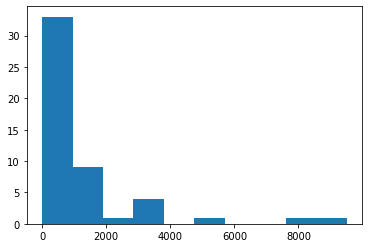

In [3]:
twitter_data.friends.hist(grid=False)

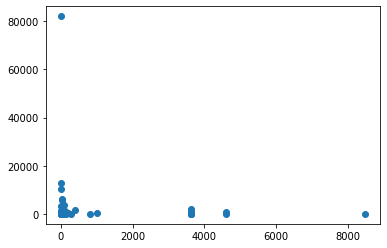

In [4]:
plt.scatter(twitter_data.retwc, twitter_data.followers)

In [5]:
twitter_data.corr()

,retwc,followers,friends
retwc,1.000000,-0.104148,-0.159657
followers,-0.104148,1.000000,0.119278
friends,-0.159657,0.119278,1.000000


In [6]:
X, y = twitter_data.retwc, twitter_data.followers
X = sm.add_constant(X)
lr_model = sm.OLS(y, X).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              followers   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5264
Date:                Mon, 04 Jan 2021   Prob (F-statistic):              0.472
Time:                        12:28:23   Log-Likelihood:                -538.52
No. Observations:                  50   AIC:                             1081.
Df Residuals:                      48   BIC:                             1085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3484.9001   1851.478      1.882      0.066    -237.747    7207.547
retwc         -0.6792      0.936     -0.726      0.472      -2.562       1.203
==============================================================================
Omnibus:                      106.916   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3740.397
Skew:                           6.362   Prob(JB):                         0.00
Kurtosis:                      43.417   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

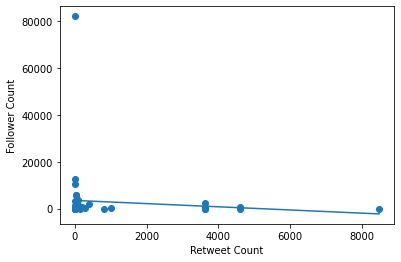

In [7]:
X_prime = np.linspace(X.retwc.min(), X.retwc.max(), 100)
X_prime = sm.add_constant(X_prime)

y_hat = lr_model.predict(X_prime)
plt.scatter(X.retwc, y)
plt.xlabel("Retweet Count")
plt.ylabel("Follower Count")
plt.plot(X_prime[:, 1], y_hat)

In [8]:
from textblob import TextBlob

In [9]:
twitter_data["polarity"] = [TextBlob(text).polarity for text in twitter_data.text]
twitter_data["subjectivity"] = [
    TextBlob(text).subjectivity for text in twitter_data.text
]

In [10]:
twitter_data.head()

,created,text,retwc,hashtag,followers,friends,polarity,subjectivity
0,2020-12-27 13:47:49,"b""RT @angelovalidiya: Asymptomatic ie healthy ...",200,COVID19,486,807,0.500000,0.500000
1,2020-12-27 13:47:49,b'@PoliceUg Uganda is the only country in the ...,0,None,10,13,0.068182,0.750000
2,2020-12-27 13:47:49,"b'@thehill \xe2\x9a\xa1\xef\xb8\x8f Sunday, De...",0,Republicans,12683,8124,0.000000,0.000000
3,2020-12-27 13:47:49,b'RT @CentrulI: \xf0\x9f\x87\xaa\xf0\x9f\x87\x...,3,COVID19,314,1686,0.250000,0.333333
4,2020-12-27 13:47:48,b'RT @Craig_A_Spencer: For everyone dismissing...,3628,COVID19,12,183,0.000000,0.066667


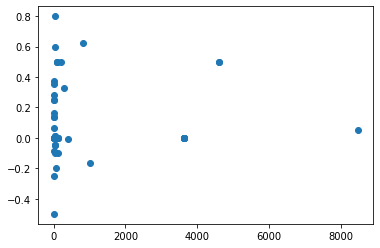

In [11]:
plt.scatter(twitter_data.retwc, twitter_data.polarity)

In [12]:
twitter_data.corr()

,retwc,followers,friends,polarity,subjectivity
retwc,1.000000,-0.104148,-0.159657,0.025557,-0.225283
followers,-0.104148,1.000000,0.119278,-0.102120,-0.213103
friends,-0.159657,0.119278,1.000000,-0.173417,-0.131691
polarity,0.025557,-0.102120,-0.173417,1.000000,0.477522
subjectivity,-0.225283,-0.213103,-0.131691,0.477522,1.000000
